In [3]:
!pip install kaggle


In [4]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jalalkhan465","key":"125bf901773cbcfc9e667cd06db1c961"}'}

In [5]:
!kaggle datasets download -d vivek468/superstore-dataset-final


Dataset URL: https://www.kaggle.com/datasets/vivek468/superstore-dataset-final
License(s): other
  0% 0.00/550k [00:00<?, ?B/s]
100% 550k/550k [00:00<00:00, 71.5MB/s]


In [6]:
!unzip superstore-dataset-final.zip


Archive:  superstore-dataset-final.zip
  inflating: Sample - Superstore.csv  


In [9]:
import pandas as pd

# Load the dataset with specified encoding
data = pd.read_csv('Sample - Superstore.csv', encoding='latin1')
data.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [11]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [12]:

# Handle outliers
# For simplicity, let's assume we're dealing with the 'Sales' column
Q1 = data['Sales'].quantile(0.25)
Q3 = data['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Filter out the outliers
data = data[~((data['Sales'] < (Q1 - 1.5 * IQR)) | (data['Sales'] > (Q3 + 1.5 * IQR)))]


<ipython-input-13-0eb1be121ee3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


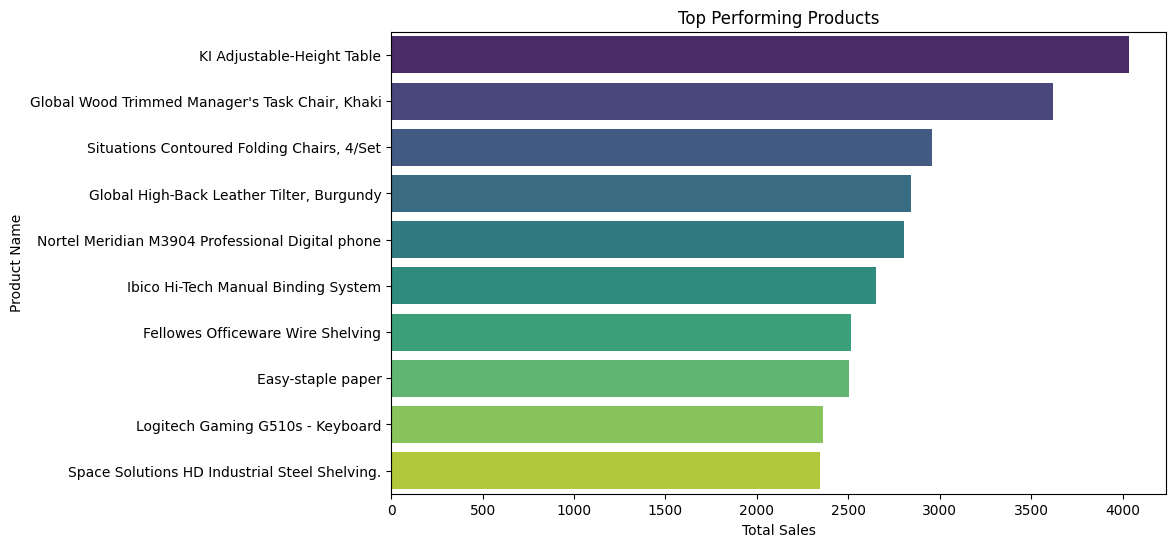

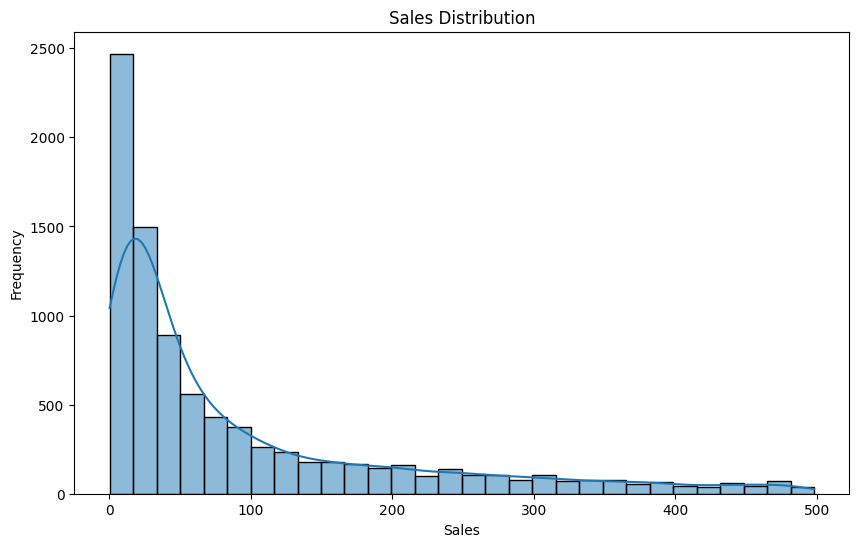

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for top-performing products
top_products = data.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top Performing Products')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.show()

# Histogram for sales distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Sales'], bins=30, kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


In [14]:
summary = f"""
Sales Data Analysis Report
==========================

1. Top Performing Products:
{top_products}

2. Sales Distribution:
- Mean Sales: {data['Sales'].mean()}
- Median Sales: {data['Sales'].median()}
- Standard Deviation: {data['Sales'].std()}

Key Insights:
- The top-performing product is {top_products.index[0]} with total sales of {top_products.values[0]}.
- The sales distribution shows a skew towards higher sales values, indicating a few products contribute significantly to total sales.

Recommendations:
- Focus on promoting and stocking the top-performing products.
- Investigate the factors leading to high sales of these products and apply similar strategies to other products.
"""

print(summary)



Sales Data Analysis Report

1. Top Performing Products:
Product Name
KI Adjustable-Height Table                          4036.761
Global Wood Trimmed Manager's Task Chair, Khaki     3621.004
Situations Contoured Folding Chairs, 4/Set          2959.866
Global High-Back Leather Tilter, Burgundy           2841.069
Nortel Meridian M3904 Professional Digital phone    2802.618
Ibico Hi-Tech Manual Binding System                 2653.413
Fellowes Officeware Wire Shelving                   2515.240
Easy-staple paper                                   2504.192
Logitech Gaming G510s - Keyboard                    2362.722
Space Solutions HD Industrial Steel Shelving.       2345.388
Name: Sales, dtype: float64

2. Sales Distribution:
- Mean Sales: 92.86485276991051
- Median Sales: 40.88
- Standard Deviation: 114.04507757061346

Key Insights:
- The top-performing product is KI Adjustable-Height Table with total sales of 4036.761.
- The sales distribution shows a skew towards higher sales values, in

In [17]:
##%cd /content/drive/My Drive/your_project_directory
##%cd /content/drive/MyDrive/Colab Notebooks/Untitled3

%cd /content/drive/MyDrive/Colab Notebooks/Untitled3/Superstore


[Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/Untitled3/Superstore'
/content
